<a href="https://colab.research.google.com/github/irythmgarg/Sampling-Assignment/blob/main/Ridham_garg_102203014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# importing dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd


In [2]:
df=pd.read_csv("/content/Creditcard_data.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,...,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,283.005181,-0.176963,0.217169,0.875172,0.285628,-0.005029,0.159081,0.123329,-0.057547,-0.030384,...,0.004888,-0.096995,-0.040344,-0.002501,0.114337,0.022782,0.023353,-0.017045,68.668290,0.011658
std,171.834196,1.294724,1.173401,1.031878,1.258758,1.098143,1.225682,0.852075,0.830144,0.878183,...,0.609335,0.607228,0.358724,0.621507,0.429667,0.484227,0.300934,0.278332,197.838269,0.107411
min,0.000000,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.770089,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.389079,-1.243924,-2.377933,-2.735623,0.000000,0.000000
25%,126.500000,-0.896416,-0.174684,0.308677,-0.460058,-0.534567,-0.630717,-0.296289,-0.167880,-0.517068,...,-0.213746,-0.525289,-0.176915,-0.379766,-0.166227,-0.313631,-0.047868,-0.033083,5.987500,0.000000
50%,282.000000,-0.382618,0.285843,0.905435,0.395919,-0.116612,-0.109581,0.116329,0.034755,-0.082270,...,-0.075802,-0.076551,-0.048353,0.091886,0.143723,-0.026414,0.023199,0.021034,16.665000,0.000000
75%,432.000000,1.110739,0.885745,1.532969,1.117559,0.452818,0.482972,0.575390,0.252395,0.412261,...,0.095149,0.307438,0.070085,0.426339,0.425798,0.260408,0.112199,0.087023,55.527500,0.000000
max,581.000000,1.586093,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,2.134599,5.459274,...,5.273420,1.574750,3.150413,1.215279,1.136720,3.087444,2.490503,1.575380,3828.040000,1.000000


In [21]:
df.shape

(772, 31)

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [10]:
df['Class'].value_counts()

,count
Class,
0,763
1,9


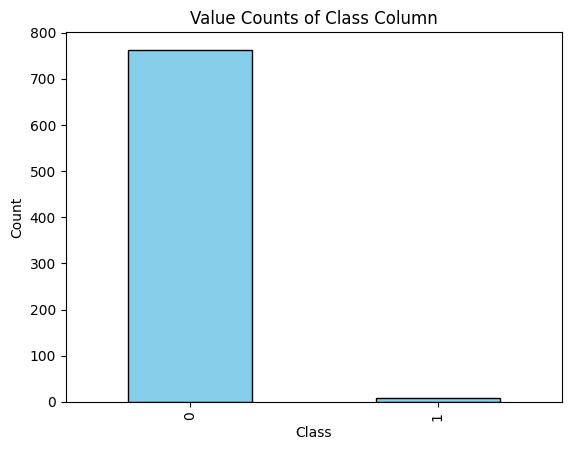

In [11]:
# Count the occurrences of each unique value
value_counts = df['Class'].value_counts()
# Plot the results as a bar chart
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Value Counts of Class Column')
# Show the plot
plt.show()


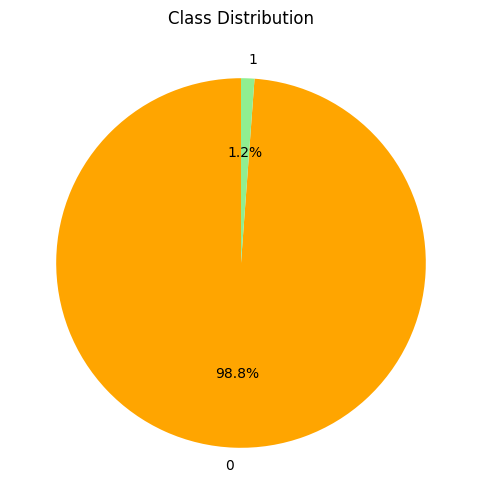

In [16]:
import matplotlib.pyplot as plt

# Count the occurrences of each unique value
value_counts = df['Class'].value_counts()

# Plot the results as a pie chart
value_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6, 6), colors=['orange', 'lightgreen', 'salmon'])

# Add a title and equal aspect ratio for a circular pie chart
plt.title('Class Distribution')
plt.ylabel('')  # Remove the y-axis label
plt.show()


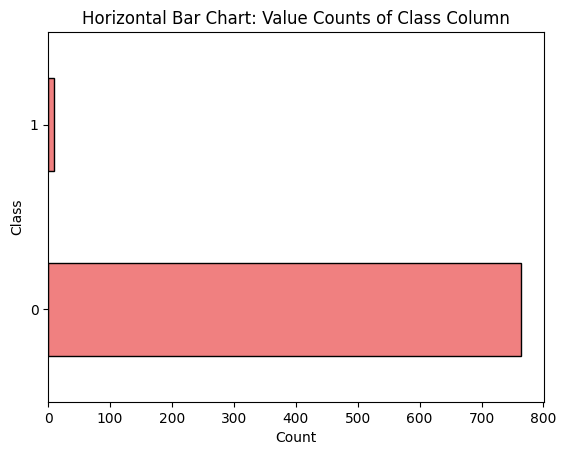

In [17]:
value_counts.plot(kind='barh', color='lightcoral', edgecolor='black')
plt.xlabel('Count')
plt.ylabel('Class')
plt.title('Horizontal Bar Chart: Value Counts of Class Column')
plt.show()


In [18]:
pip install imbalanced-learn

In [19]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd

# Separate features (X) and target labels (y)
X = df.drop('Class', axis=1)
y = df['Class']


# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after applying SMOTE
print("After SMOTE:", Counter(y_resampled))

# Create a new balanced DataFrame
balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
balanced_df['Class'] = y_resampled

# Display the balanced DataFrame
print(balanced_df.head())


Before SMOTE: Counter({0: 763, 1: 9})
After SMOTE: Counter({0: 763, 1: 763})
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431

In [20]:
balanced_df.shape

(1526, 31)

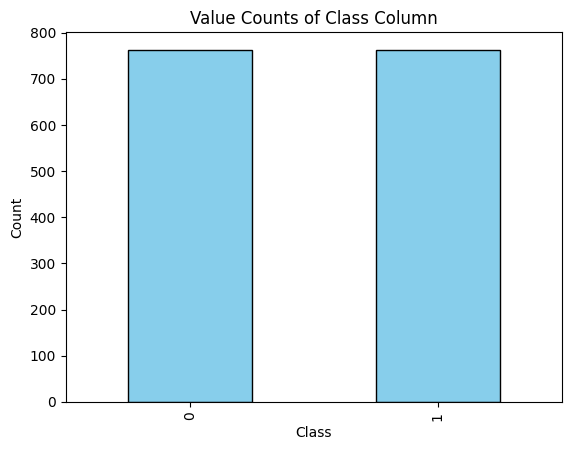

In [22]:
# Count the occurrences of each unique value
value_counts = balanced_df['Class'].value_counts()
# Plot the results as a bar chart
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Value Counts of Class Column')
# Show the plot
plt.show()


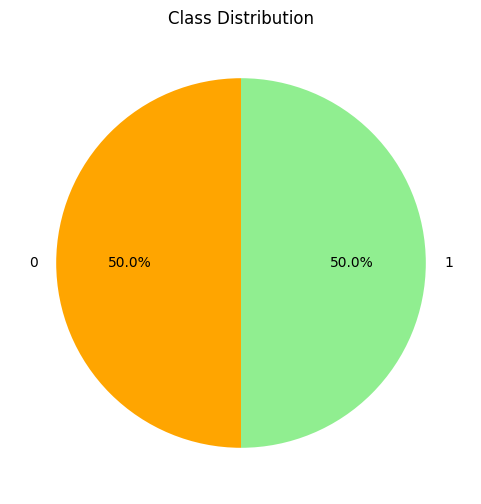

In [23]:
import matplotlib.pyplot as plt

# Count the occurrences of each unique value
value_counts =balanced_df['Class'].value_counts()

# Plot the results as a pie chart
value_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6, 6), colors=['orange', 'lightgreen', 'salmon'])

# Add a title and equal aspect ratio for a circular pie chart
plt.title('Class Distribution')
plt.ylabel('')  # Remove the y-axis label
plt.show()


In [26]:
balanced_df['Class'].value_counts()

,count
Class,
0,763
1,763


In [32]:
X.shape

(772, 30)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [30]:
print("Class Distribution BEFORE SMOTE:", Counter(y_train))

# Train a logistic regression model
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)

# Evaluate the model
y_pred = lr.predict(X_test)
print("\nLogistic Regression BEFORE SMOTE:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Class Distribution BEFORE SMOTE: Counter({0: 534, 1: 6})

Logistic Regression BEFORE SMOTE:
Confusion Matrix:
 [[229   0]
 [  3   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       229
           1       0.00      0.00      0.00         3

    accuracy                           0.99       232
   macro avg       0.49      0.50      0.50       232
weighted avg       0.97      0.99      0.98       232



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
